<h1 style="text-align:center; color:black;">Movie Recommendation System Using Content-Based Filtering
</h1>

<h2 >Goal of the Project</h2>

<p style="text-align:justify; color:black;">
The goal of this notebook is to implement <strong>a content-based</strong> movie recommendation system. This system will leverage movie attributes such as genres, keywords, cast, and director to suggest movies that are similar based on their content features.
.</p>


## Work Overview

This notebook covers the following topics:

- Data Loading
- Data Exploration
- Data Analysis
- Data Preprocessing
- GUI Interface
- Conclusion
- Future Directions

# Import Packages

In [44]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel
import tkinter as tk
from tkinter import simpledialog, messagebox
import nltk
from nltk.stem import PorterStemmer
nltk.download('stopword')
from nltk.corpus import stopwords
stopwords=stopwords.words('english')
import re
import missingno as msno
from tkinter import ttk
from tkinter import scrolledtext
import tkinter as tk

[nltk_data] Error loading stopword: Package 'stopword' not found in
[nltk_data]     index


# Data Loading

In [45]:
movies_data = pd.read_csv('movies.csv')
movies_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [101]:
movies_data.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director',
       'release_year'],
      dtype='object')

## Dataset Columns Description

The dataset used for this movie recommendation system contains the following columns:

- **index**: Index of the movie in the dataset.
- **budget**: Budget allocated for the movie's production.
- **genres**: Genres associated with the movie (e.g., Action, Drama).
- **homepage**: URL of the movie's official website.
- **id**: Unique identifier for the movie.
- **keywords**: Keywords or tags related to the movie's content.
- **original_language**: Original language in which the movie was filmed.
- **original_title**: Original title of the movie.
- **overview**: Brief summary or plot overview of the movie.
- **popularity**: Popularity score of the movie.
- **production_companies**: Production companies involved in making the movie.
- **production_countries**: Countries where the movie was produced.
- **release_date**: Date when the movie was released.
- **revenue**: Revenue generated by the movie.
- **runtime**: Duration of the movie in minutes.
- **spoken_languages**: Languages spoken in the movie.
- **status**: Status of the movie (e.g., Released, Rumored).
- **tagline**: Tagline associated with the movie.
- **title**: Title of the movie.
- **vote_average**: Average rating given to the movie by users.
- **vote_count**: Number of votes received by the movie.
- **cast**: Actors and actresses featured in the movie.
- **crew**: Crew members involved in making the movie.
- **director**: Director(s) of the movie.
- **release_year**: Year or the recommendation system.
ributes and user preferences.


# Data Exploration

In [46]:
movies_data.shape

(4803, 24)

In [47]:
movies_data.duplicated().sum()

0

In [48]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

<Axes: >

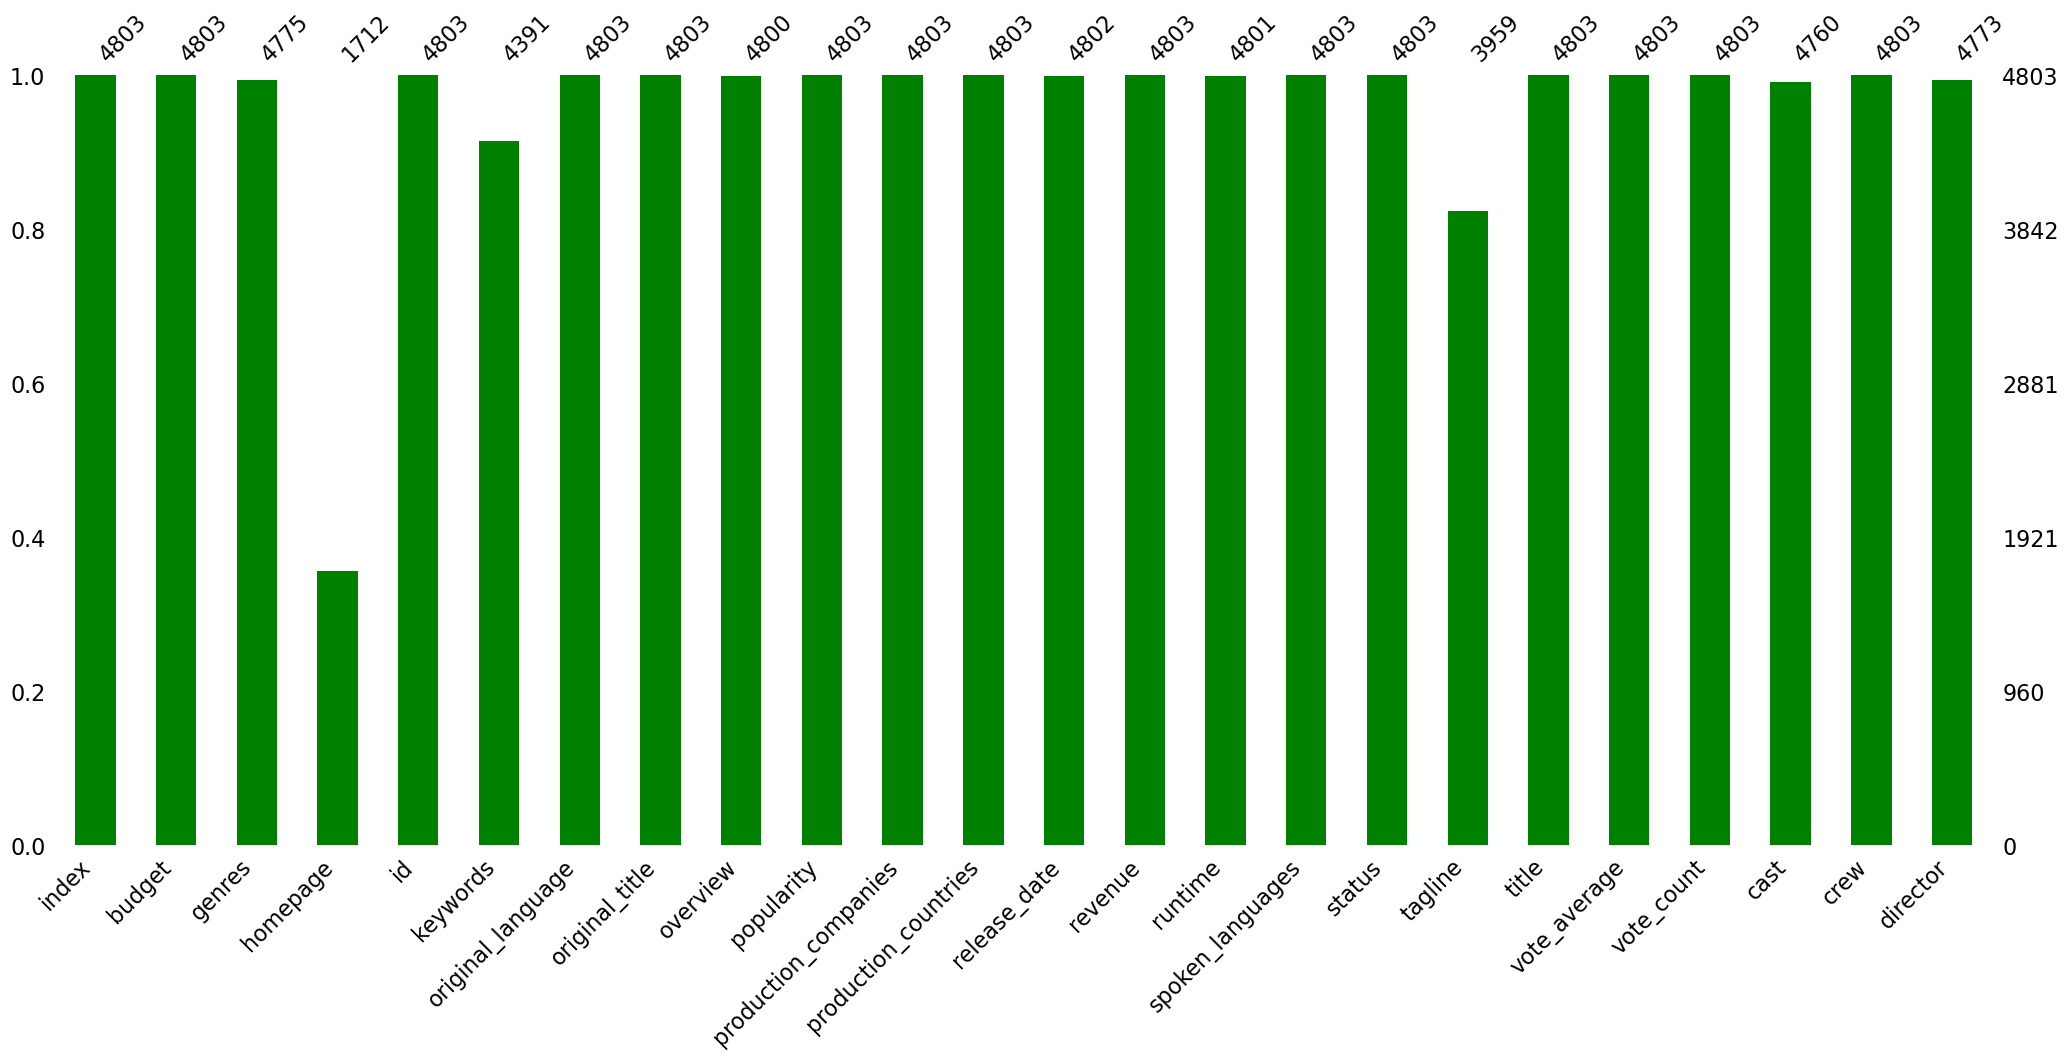

In [51]:
# Checking null values
msno.bar(movies_data,color='g')

# Data Analysis

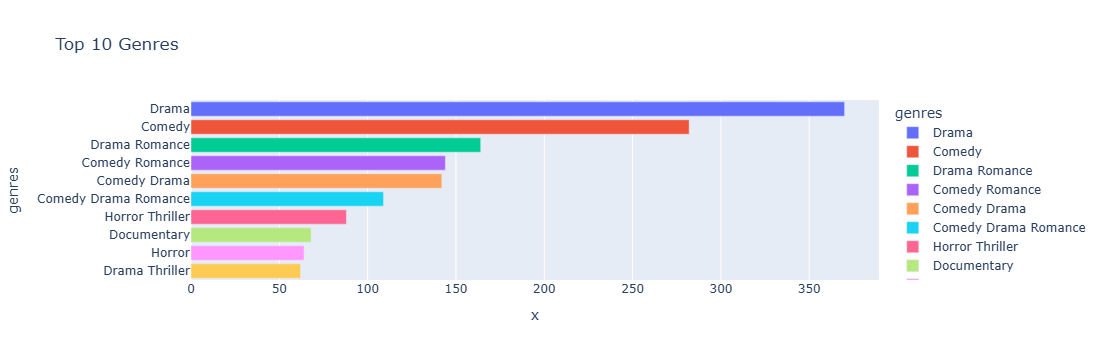

In [52]:
genres_count = movies_data['genres'].value_counts().head(10)
fig = px.bar(genres_count, x=genres_count.values, y=genres_count.index, orientation='h', title='Top 10 Genres', color=genres_count.index, )
fig.show()

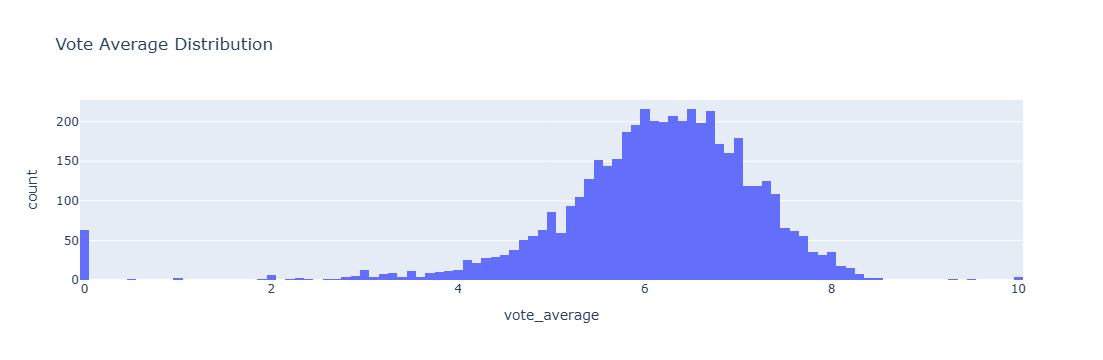

In [53]:
fig = px.histogram(movies_data, x='vote_average', title='Vote Average Distribution')
fig.show()

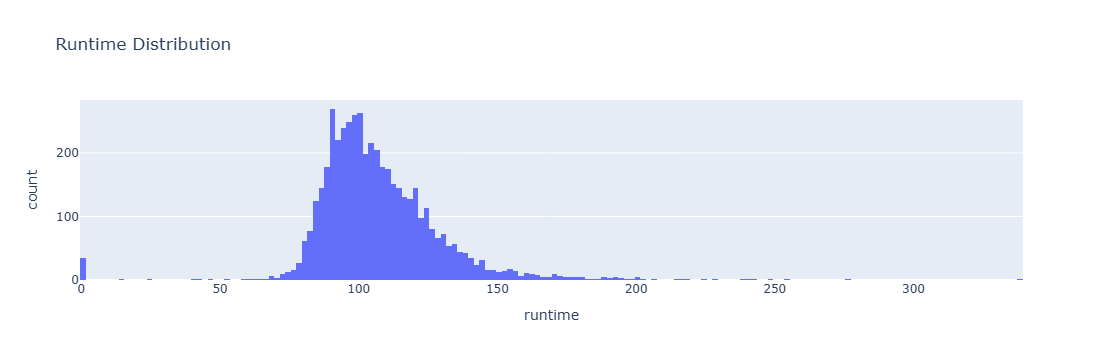

In [54]:
fig = px.histogram(movies_data, x='runtime', title='Runtime Distribution')
fig.show()

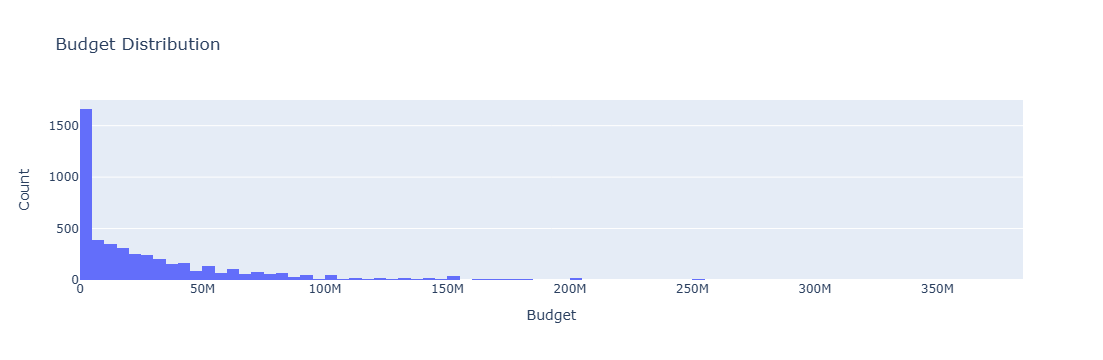

In [55]:
fig = px.histogram(movies_data, x='budget', title='Budget Distribution')
fig.update_layout(xaxis_title='Budget', yaxis_title='Count')
fig.show()

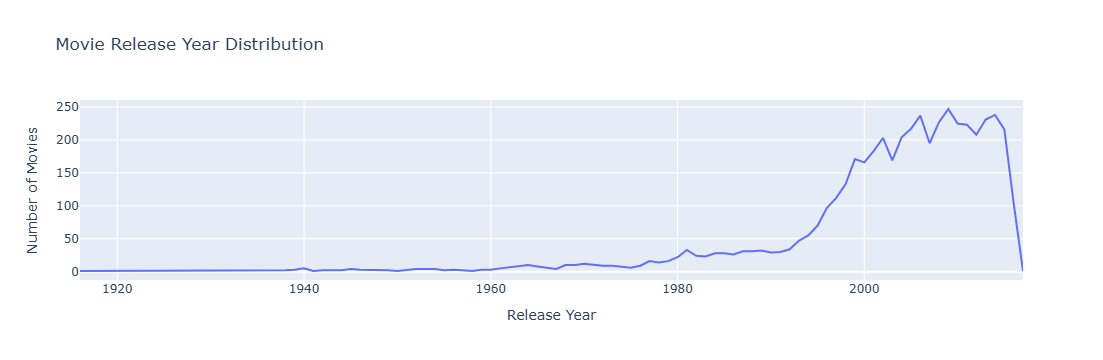

In [56]:
movies_data['release_year'] = pd.to_datetime(movies_data['release_date']).dt.year
release_year_count = movies_data['release_year'].value_counts().sort_index()
fig = px.line(release_year_count, x=release_year_count.index, y=release_year_count.values, title='Movie Release Year Distribution')
fig.update_xaxes(title='Release Year')
fig.update_yaxes(title='Number of Movies')
fig.show()

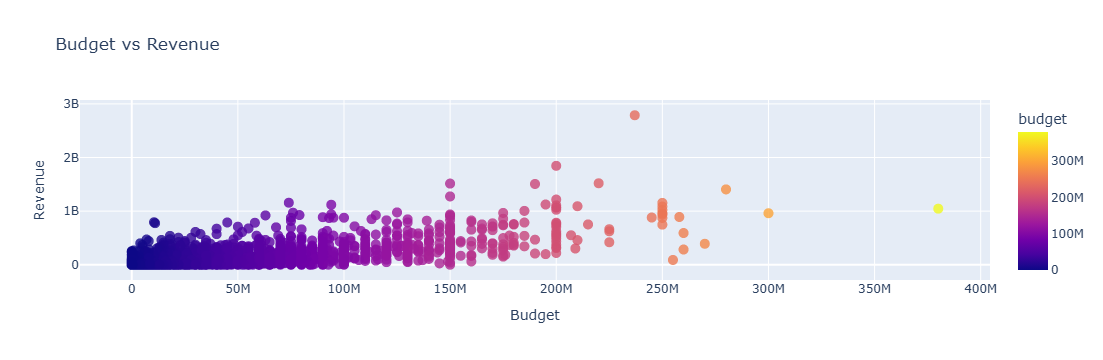

In [57]:
color_scale = px.colors.sequential.Plasma
fig = px.scatter(movies_data, x='budget', y='revenue', title='Budget vs Revenue',
                 color='budget', color_continuous_scale=color_scale)
fig.update_traces(marker=dict(size=10, opacity=0.8))
fig.update_layout(xaxis_title='Budget', yaxis_title='Revenue')
fig.show()


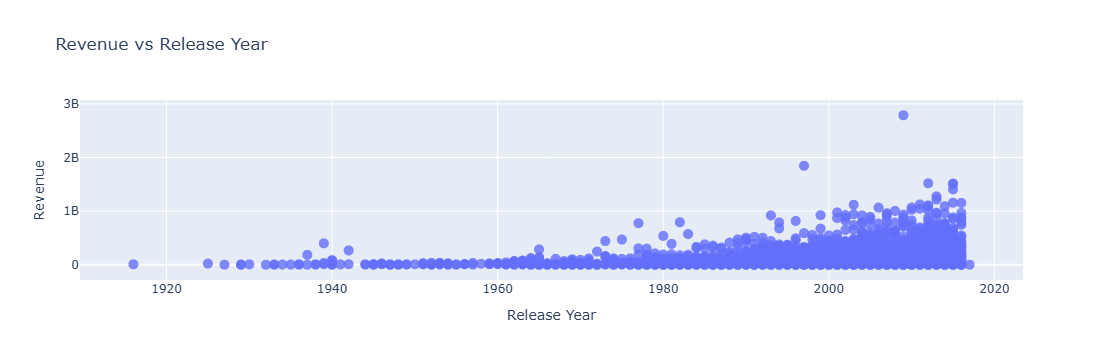

In [58]:
movies_data['release_year'] = pd.to_datetime(movies_data['release_date']).dt.year
fig = px.scatter(movies_data, x='release_year', y='revenue', title='Revenue vs Release Year')
fig.update_traces(marker=dict(size=10, opacity=0.8))
fig.update_layout(xaxis_title='Release Year', yaxis_title='Revenue')
fig.show()

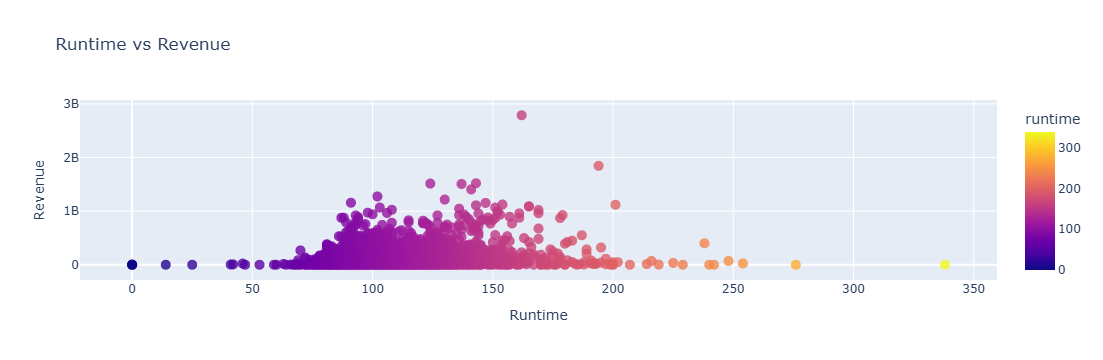

In [59]:
color_scale = px.colors.sequential.Plasma
fig = px.scatter(movies_data, x='runtime', y='revenue', color='runtime', title='Runtime vs Revenue',
                 color_continuous_scale=color_scale)
fig.update_traces(marker=dict(size=10, opacity=0.8))
fig.update_layout(xaxis_title='Runtime', yaxis_title='Revenue')
fig.show()

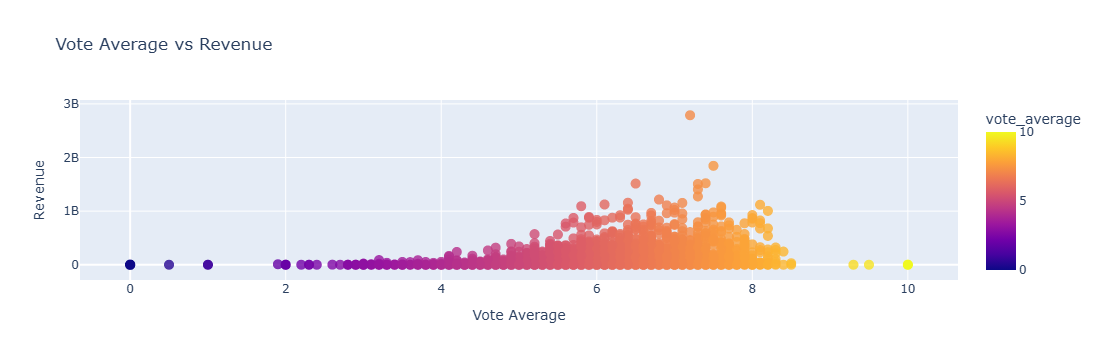

In [60]:
color_scale = px.colors.sequential.Plasma
fig = px.scatter(movies_data, x='vote_average', y='revenue', color='vote_average', title='Vote Average vs Revenue',
                 color_continuous_scale=color_scale)
fig.update_traces(marker=dict(size=10, opacity=0.8))
fig.update_layout(xaxis_title='Vote Average', yaxis_title='Revenue')
fig.show()

# Data Preprocessing

Combine The Relevant Features

In [61]:
selected_features = ['genres','keywords','tagline','cast','director']
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [62]:
# replacing the null valuess with null string
for feature in selected_features:
  movies_data[feature] = movies_data[feature].fillna('')

In [63]:
combined_features = movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['tagline']+' '+movies_data['cast']+' '+movies_data['director']

#### Rationale for Choosing Combined Features

##### Selection Criteria

The decision to focus on the following combined features for the movie recommendation system was based on several key factors:

1. **Relevance to Movie Content:** 
   - **Genres:** Genres provide fundamental categorization of movies based on their thematic content, influencing viewer preferences.
   - **Keywords:** Keywords capture specific themes, topics, or elements within a movie, enhancing the depth of content representation.
   - **Tagline:** Taglines succinctly convey the essence or appeal of a movie, often influencing viewer interest and expectations.
   - **Cast and Director:** Inclusion of cast members and directors adds a layer of personalization, reflecting viewer preferences for certain actors or directors.

Text Cleaning

In [64]:
def remove_stop_words (text:str):
    text = nltk.word_tokenize(text)
    text = [word for word in text if word not in stopwords]
    return ' '.join(text)

In [65]:
def remove_special_characters(text):
    special_char_pattern = re.compile(r'[^\w\s\u0600-\u06FF]')
    return special_char_pattern.sub('', text)

In [66]:
def remove_numbers(text):
    number_pattern = re.compile(r'\d+')
    return number_pattern.sub('', text)

In [67]:
def remove_multiple_spaces(text):
    space_pattern = re.compile(r'\s+')
    return space_pattern.sub(' ', text)

In [68]:
cleaned_text = []
def clean_all(text:str):
    ps = PorterStemmer()
    for sample in text:
        sample = sample.lower()
        sample = remove_stop_words(sample)
        sample = remove_special_characters(sample)
        sample = remove_numbers(sample)
        sample = remove_multiple_spaces(sample)
        sample = ps.stem(sample)
        cleaned_text.append(sample)

In [69]:
clean_all(combined_features)

In [70]:
len(combined_features[50]),len(cleaned_text[50])

(193, 180)

Text Vectorization

In [89]:
tfidf_matrix = tfidf.fit_transform(cleaned_text)

In [90]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

Recommendation Function

In [92]:
def get_recommendations(title, cosine_sim):
    idx = df[df['original_title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Top 10 similar movies
    movie_indices = [i[0] for i in sim_scores]
    return df['original_title'].iloc[movie_indices]

# GUI

In [99]:
class MovieRecommenderApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Movie Recommender")
        
        # Title label
        self.title_label = ttk.Label(self.root, text="Movie Recommender", font=('Helvetica', 16))
        self.title_label.pack(pady=10)
        
        # Entry box for movie title input
        self.title_var = tk.StringVar()
        self.title_entry = ttk.Entry(self.root, textvariable=self.title_var, width=40)
        self.title_entry.pack(pady=10)
        
        # Button to get recommendations
        self.recommend_button = ttk.Button(self.root, text="Get Recommendations", command=self.get_recommendations)
        self.recommend_button.pack(pady=10)
        
        # Text area to display recommendations
        self.recommendations_text = tk.Text(self.root, height=10, width=60)
        self.recommendations_text.pack(pady=10)
        
    def get_recommendations(self):
        input_title = self.title_var.get().strip()
        if input_title:
            recommendations = get_recommendations(input_title, cosine_sim)
            self.recommendations_text.delete('1.0', tk.END)
            self.recommendations_text.insert(tk.END, "Recommended Movies:\n")
            for i, movie in enumerate(recommendations):
                self.recommendations_text.insert(tk.END, f"{i+1}. {movie}\n")

# Initialize Tkinter
root = tk.Tk()
app = MovieRecommenderApp(root)
root.mainloop()

## Conclusion

### Summary of Findings
This project successfully implemented a content-based movie recommendation system using Python. The system leveraged movie attributes such as genres, keywords, and cast information to suggest similar movies based on their content features. Key findings from the analysis inclution in various domains.



### Future Directions
To further enhance the recommendation system, future directions could include:

- **Incorporating Collaborative Filtering:** Combining content-based and collaborative filtering approaches for more accurate and personalized recommendations.
  
- **Enhanced User Interface:** Developing a more interactive and user-friendly interface for better user engagement.
  
- **Deployment:** Deploying the system as a web application or API to provide real-time recommendations to users.